##**Programação e Algoritmos II**

Prof. Alexandre Levada

###**Listas Encadeadas**

Em Python é possível utilizar listas de maneira dinâmica e totalmente transparente. Por maneira dinâmica queremos dizer uma lista pode ser facilmente aumentada ou diminuída em tempo de execução a partir da inserção ou remoção de elementos. 

Nesse contexto, as listas encadeadas são estruturas dinâmicas que utilizam um esquema de encadeamentos lógicos sequenciais de modo a permitir que elementos vizinhos não precisem ocupar posições vizinhas da memória, como mostrado na figura a seguir. 

Em resumo, uma lista encadeada é uma estrutura linear cuja ordem dos elementos não é dada pela localização física dos dados na memória do computador (como em um vetor). Ao inveś disso, cada elemento aponta para o próximo, mesmo que ele esteja longe na memória.


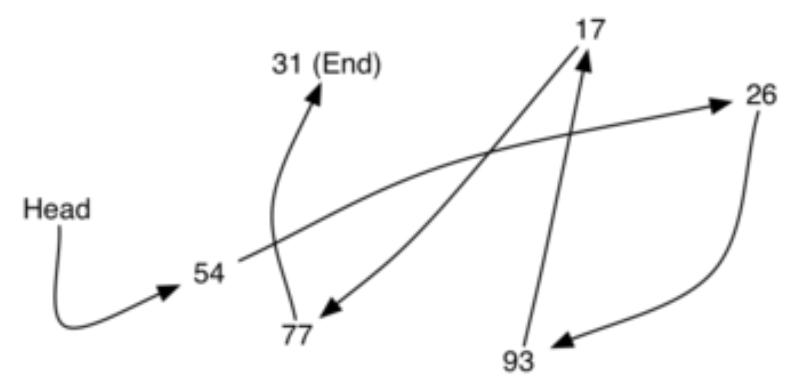

A estrutura lógica de uma lista encadeada é ilustrada pela figura a seguir. Note que cada nó da lista possui duas variáveis: um campo para armazenar os dados e uma referência para apontar para o próximo nó da lista encadeada.

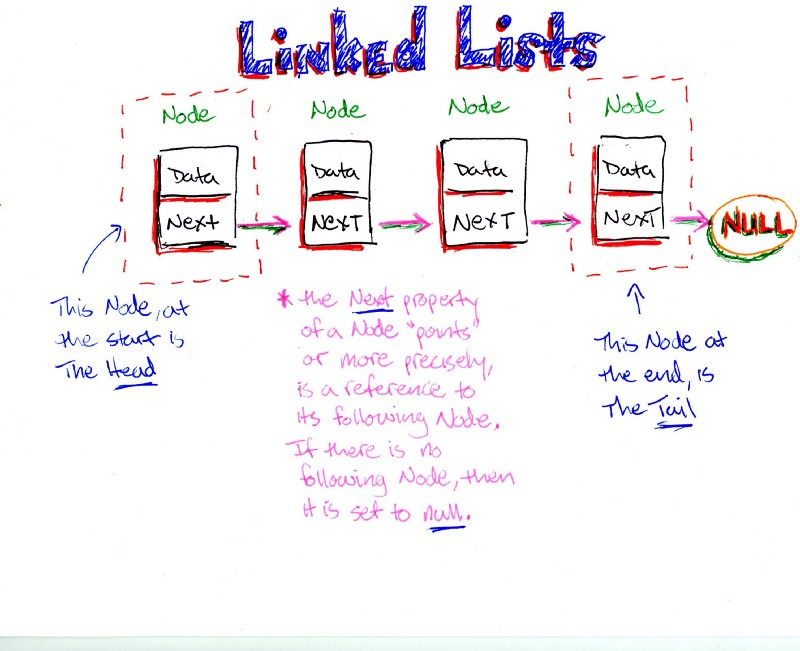

Primeiramente, antes de definirmos uma lista encadeada, devemos definir o bloco básico de construção de uma lista: o nó.


In [ ]:
class Node:
     # Construtor	
     def __init__(self, init_data):
          self.data = init_data
          self.next = None	# inicialmente não aponta para ninguém
     
     # Obtém o dado armazenado
     def get_data(self):
          return self.data

     # Retorna o próximo elemento (para quem nó aponta)
     def get_next(self):
          return self.next

     # Armazena uma nova informação (atualiza dados)
     def set_data(self, new_data):
          self.data = new_data

     # Aponta o nó para outro nó
     def set_next(self, new_next):
          self.next = new_next

if __name__ == '__main__':
  temp = Node(93)
  print(temp.get_data())

93


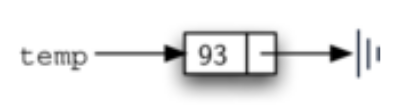

**Listas Encadeadas não ordenadas**

Em uma lista não ordenada, a principal característica é que a inserção de um novo nó é feita sempre no início ou no final da lista, ou seja, os elementos do conjunto não encontram-se ordenados. 

Iniciaremos apresentando como criar uma lista encadeada não ordenada vazia. 

Adotaremos o seguinte construtor, em que head (cabeça) é uma referência para o primeiro nó da lista:



In [ ]:
def __init__(self):
     self.head = None

Podemos instanciar um objeto dessa classe como:

In [ ]:
mylist = UnorderedList()

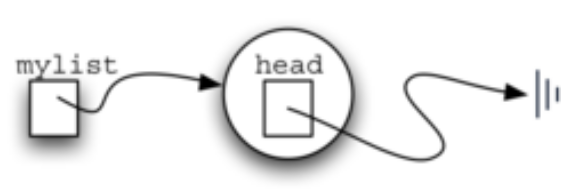

O primeiro método que iremos desenvolver é o mais simples deles. Ele verifica se a lista é vazia, condição que requer que a cabeça da lista seja igual a None.



In [ ]:
def is_empty(self):
     return self.head == None

A próxima função é a responsável por adicionar um elemento no início da lista. A lógica dessa operação consiste em apontar o novo nó para a cabeça da lista (head) e fazer a cabeça da lista apontar para esse novo nó recém inserido (pois ele será o primeiro elemento da lista). O diagrama a seguir ilustra o resultado da execução dos comandos a seguir:

In [ ]:
mylist.add_head(31)
mylist.add_head(77)
mylist.add_head(17)
mylist.add_head(93)
mylist.add_head(26)

A ilustração a seguir mostra como devemos proceder para inserir um novo nó no início da lista.

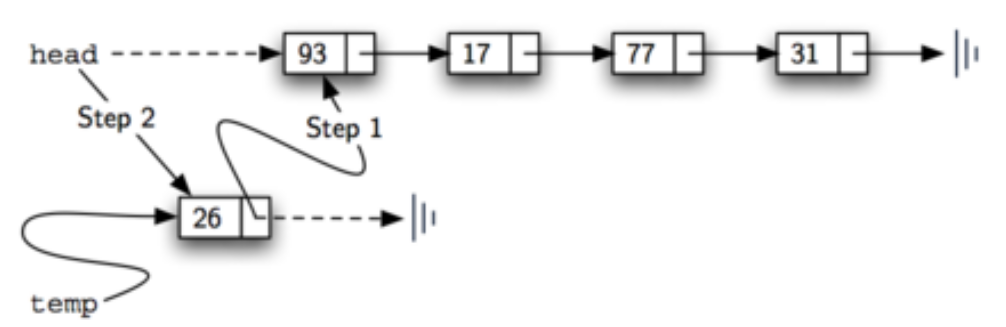

O código fonte a seguir mostra a implementação desse método em Python.



In [ ]:
def add_head(self, item):
     # Cria novo nó
     temp = Node(item)
     # Aponta novo nó para cabeça da lista
     temp.set_next(self.head)
     # Atualiza a cabeça da lista
     self.head = temp

De modo análogo, podemos realizar a inserção no final da lista (tail). Para isso, devemos criar um novo nó e posicionar uma referência no último elemento da lista. Para isso, é preciso apontar temp para a cabeça da lista e percorrer a lista até atingir um nó tal que o próximo elemento seja definido como None. Isso significa que estamos no último elemento da lista. 
     
Ao percorrermos uma lista encadeada, devemos iniciar na cabeça da lista (head) e a cada iteração fazer a referência apontar para o seu sucessor (get_next). A figura a seguir ilustra esse processo.

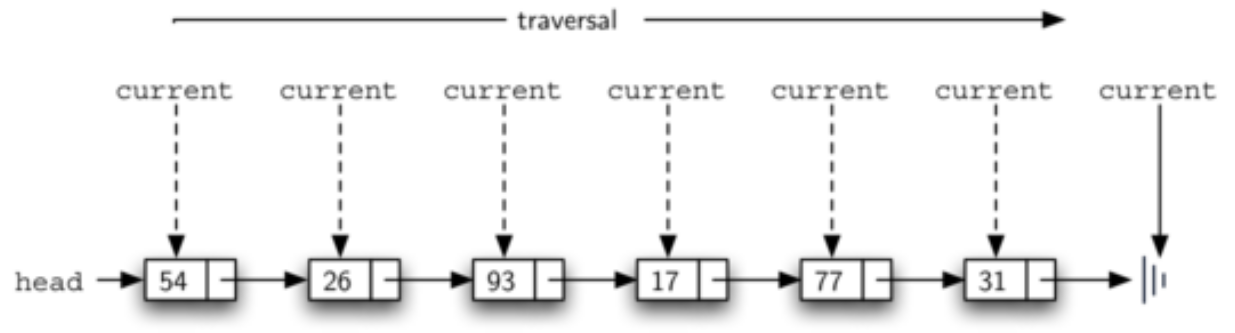

A função a seguir implementa essa funcionalidade em Python.

In [ ]:
def add_tail(self, item):
  # Cria novo nó
  tail = Node(item)
  # Usa referência temporária para percorer lista (aponta na cabeça)
  temp = self.head
  # Percorre a lista até o último elemento
  while temp.next != None:
    temp = temp.get_next()
  # Aponta tail (ultimo elemento) para novo nó
  temp.set_next(tail)

Precisamos ainda implementar uma função para retornar quantos elementos existem na lista encadeada. Como ela é dinâmica, precisamos percorrê-la toda vez que desejarmos contar o número de elementos. A ideia é simples: iniciando na cabeça da lista, devemos percorrer todos os nós, sendo que a cada nó visitado, incrementamos uma unidade no contador. A função a seguir mostra uma implementação em Python.



In [ ]:
def size(self):
	# Aponta para cabeça da lista
	temp = self.head
	count = 0
	while temp != None:
		count = count + 1
		temp = temp.get_next()
	
	return count

Outra funcionalidade importante consiste em buscar um elemento na lista encadeada, ou seja, verificar se um dado elemento pertence ao conjunto. Para isso, devemos percorrer a lista até encontrar o elemento desejado (e retornar True, uma vez que o elemento desejado pertence a lista), ou até atingir o final da lista (e retornar False, pois o elemento não pertence ao conjunto). A figura a seguir ilustra esse processo.

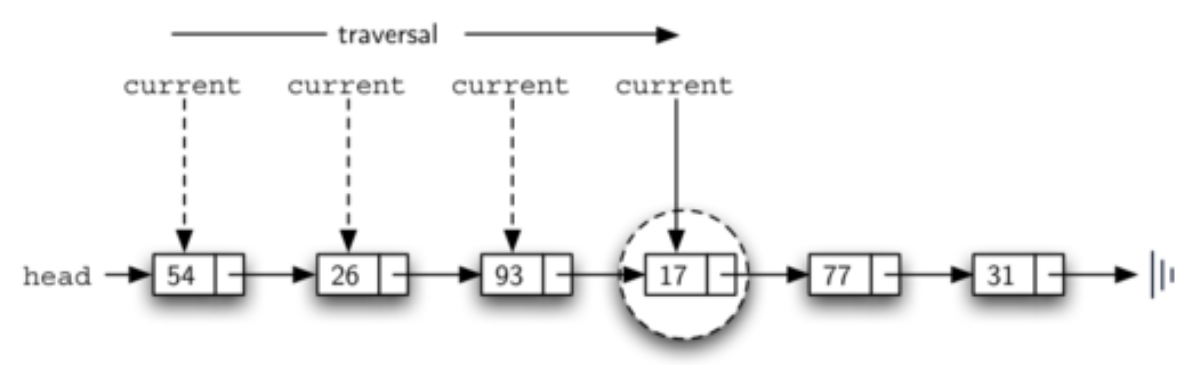

A função a seguir mostra uma implementação da busca por um elemento em uma lista encadeada em Python.

In [ ]:
# Busca pelo elemento na lista
def search(self,item):
	# Inicia na cabeça da lista
	temp = self.head
	found = False
        
	# Percorre a lista até achar elemento u chegar no final
	while temp != None and not found:
		# Se achar atual nó contém elemento, found == True
		if temp.get_data() == item:
			found = True
		else:
			# Se não, aponta para o sucessor
			temp = temp.get_next()
        
	return found

Uma outra operação importante é a remoção de um dado elemento da lista encadeada. Note que ao remover um nó da lista, precisamos religar o antecessor com o sucessor, de modo a evitar que elementos fiquem inacessíveis pela quebra do encadeamento sequencial. Primeiramente, preciamos ter duas referências se movendo ao longo da lista: current, que aponta para o elemento corrente da lista encadeada e previous, que aponta para seu antecessor. Eles devem se mover conjuntamente, até que current aponte diretamente para o nó a ser removido. A figura a seguir ilustra o processo.

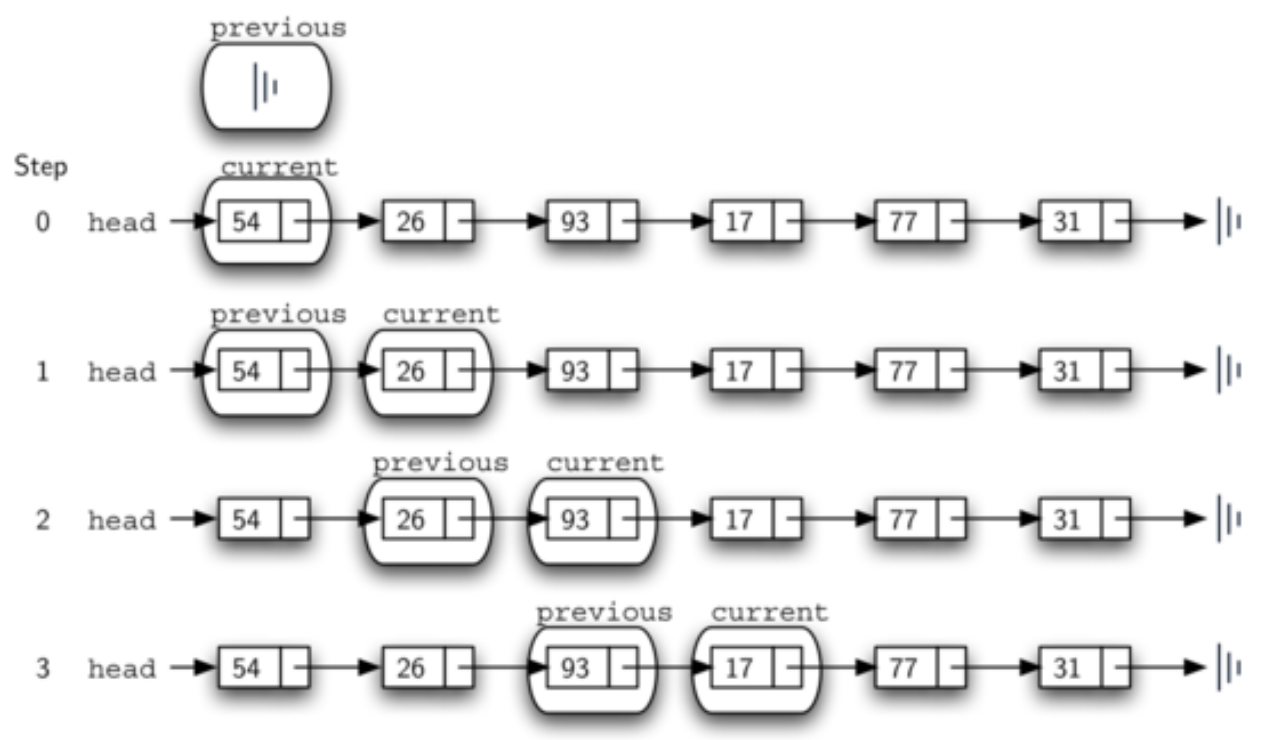

Em seguida, devemos apontar o valor de next da referência previous para o mesmo local apontado pelo valor de next da referência corrente. Por fim, apontamos o valor de next da referência corrente para None, de modo a excluir completamente o nó da lista encadeada. A figura a seguir mostra uma ilustração gráfica do processo.

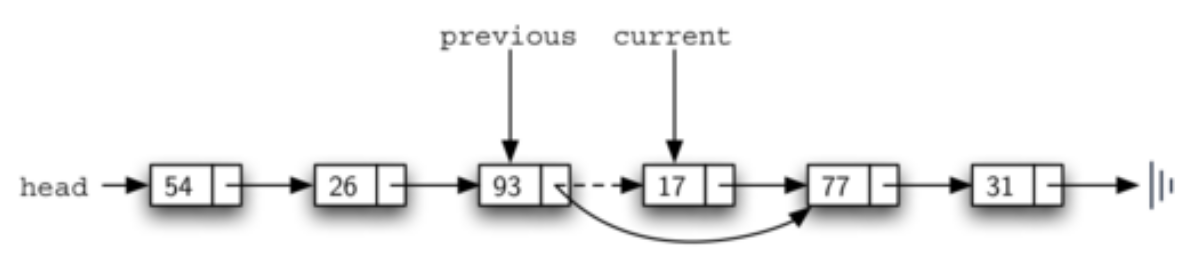

Porém, há um caso particular a ser considerado: se o nó que desejamos remover é o primeiro da lista. Neste caso, previous aponta para None, então devemos manipular a referência head, ou seja a cabeça da lista, conforme ilustra a figura a seguir.

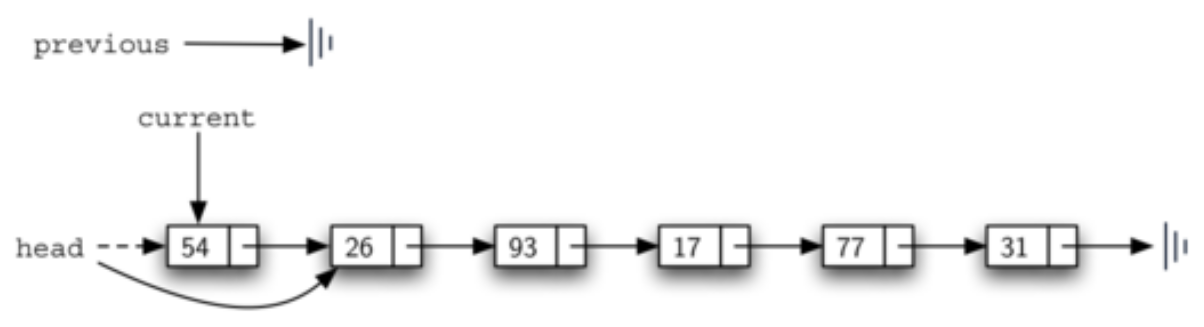

O código em Python a seguir apresenta uma implementação para o método remove().


In [ ]:
# Remove um nó da lista encadeada
def remove(self, item):
	# Aponta a referência corrente para cabeça de L
	current = self.head
	# Aponta referência previous para None
	previous = None
	found = False
	# Enquanto não encontrar o valor a ser removido
	while not found and current != None:
		# Se nó corrente armazena o item desejado, encontrou
           if current.get_data() == item:
           	found = True
           else:
           	# Se no corrente não é o que buscamos
                # Atualiza o previous e o corrente
                previous = current
                current = current.get_next()
	# Se nó a ser removido for o primeiro da lista
	# Altera a cabeça da lista
	if previous == None:
		self.head = current.get_next()
	else:
		# Caso não seja primeiro nó, liga o previous com o próximo
		previous.set_next(current.get_next())
	# Desliga nó corrente
	current.set_next(None)

Ex: Faça uma função em Python para inverter uma lista encadeada L.

Em termos gráficos, desejamos receber uma lista L como a seguir na entrada:

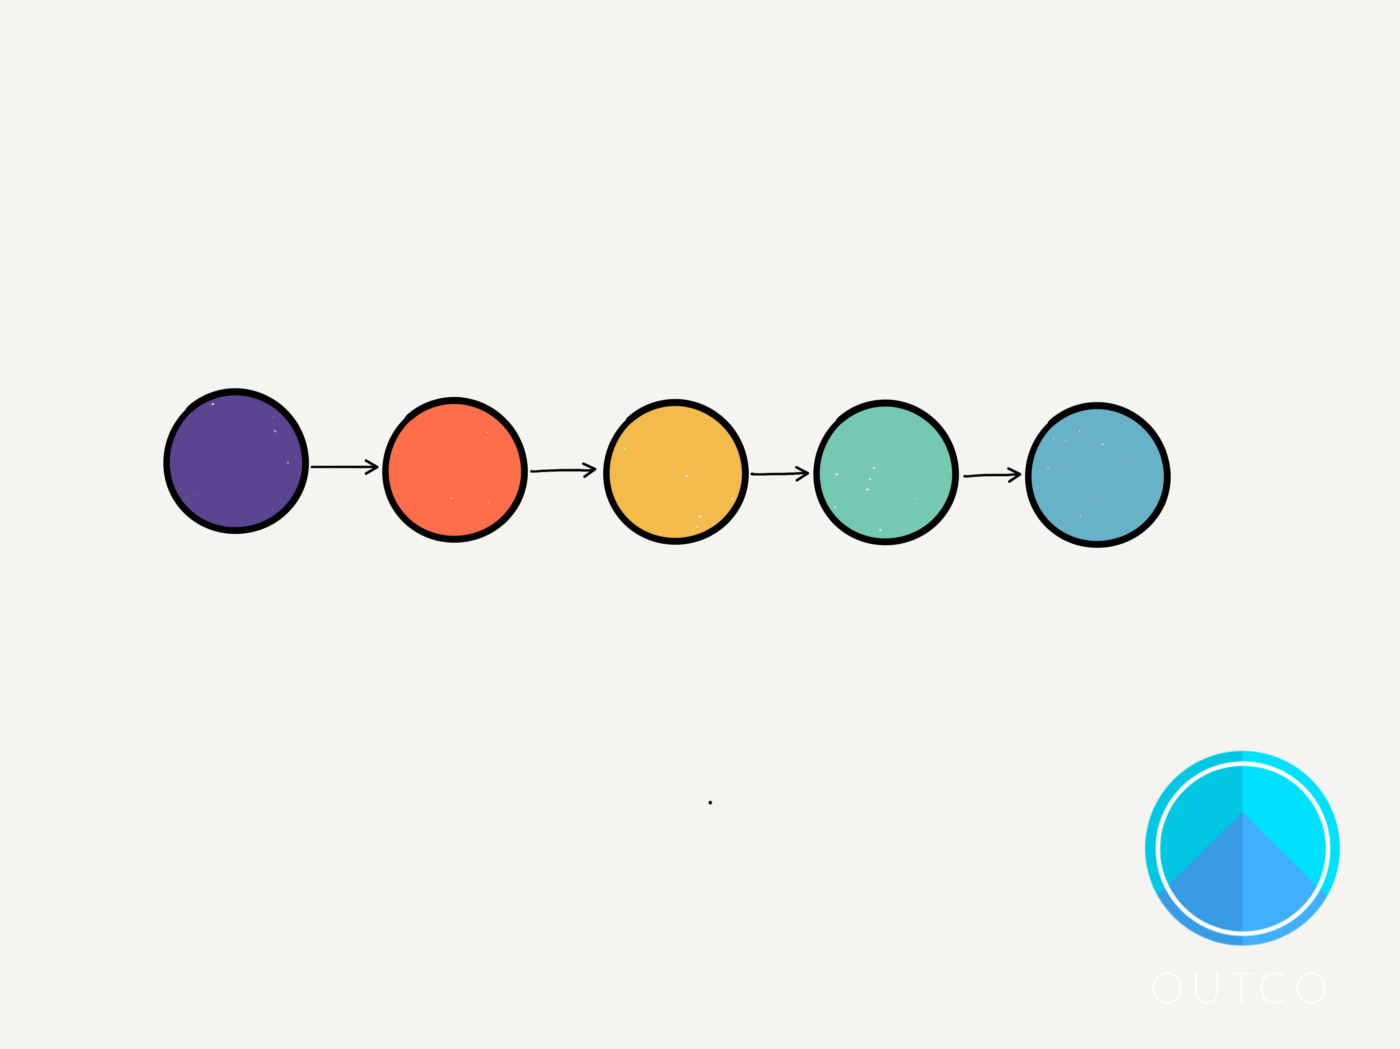

e retornar uma lista com as referências invertidas (de trás para frente)

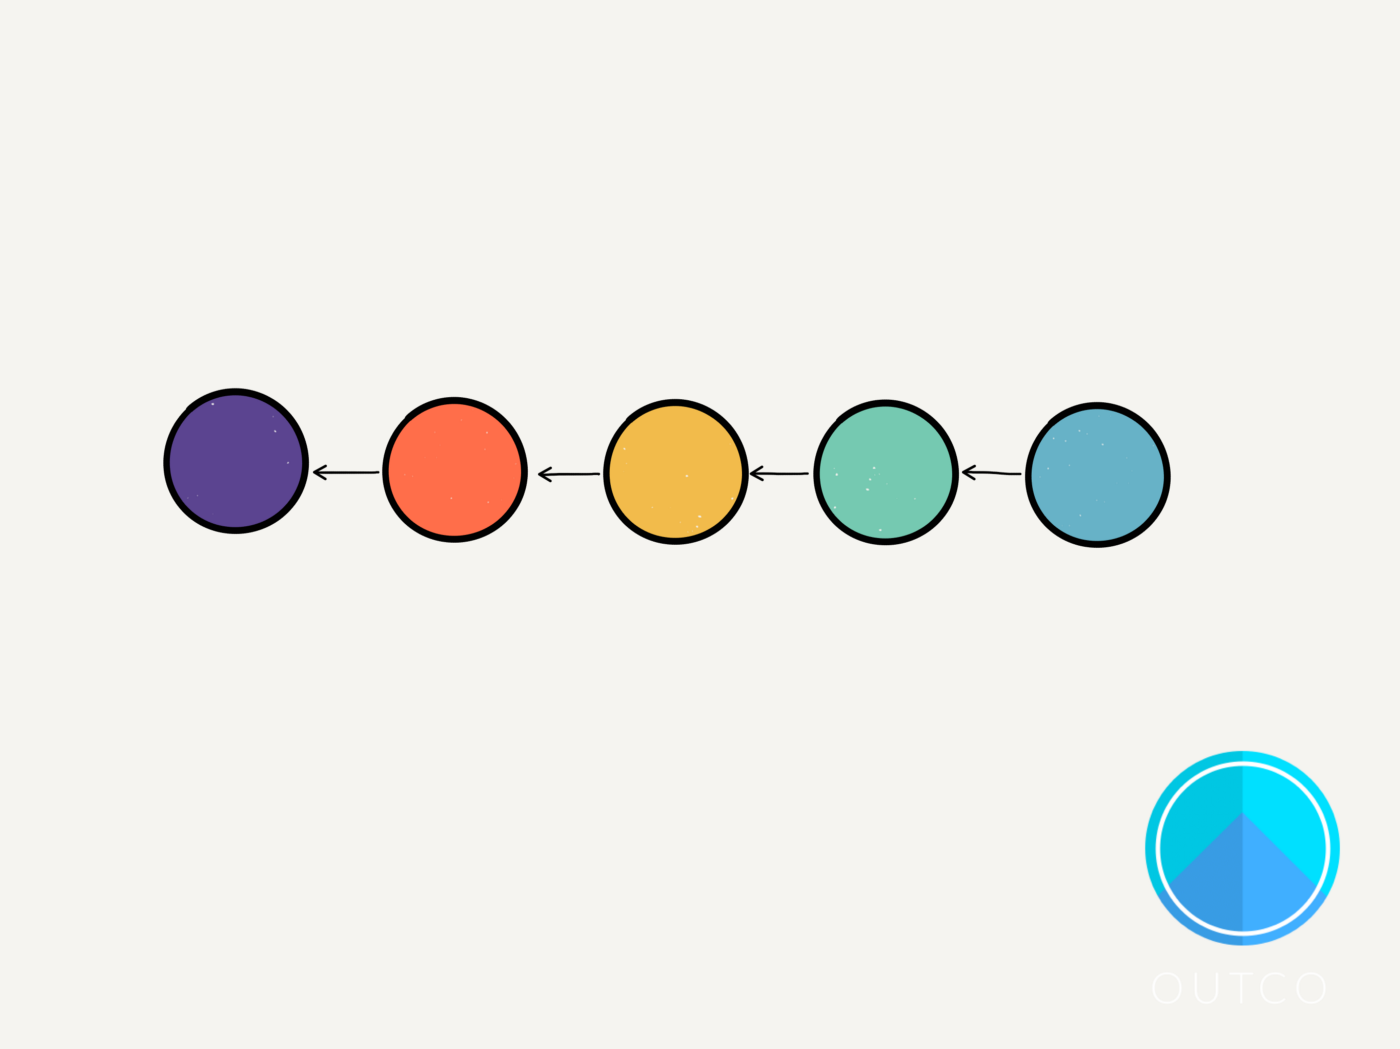

A ideia consiste em cada nó da lista manter 3 referências: o atual (current), o anterior (previous) e o posterior (following) e a cada passo devemos apontar o campo next do no atual para o anterior ao invés do posterior.

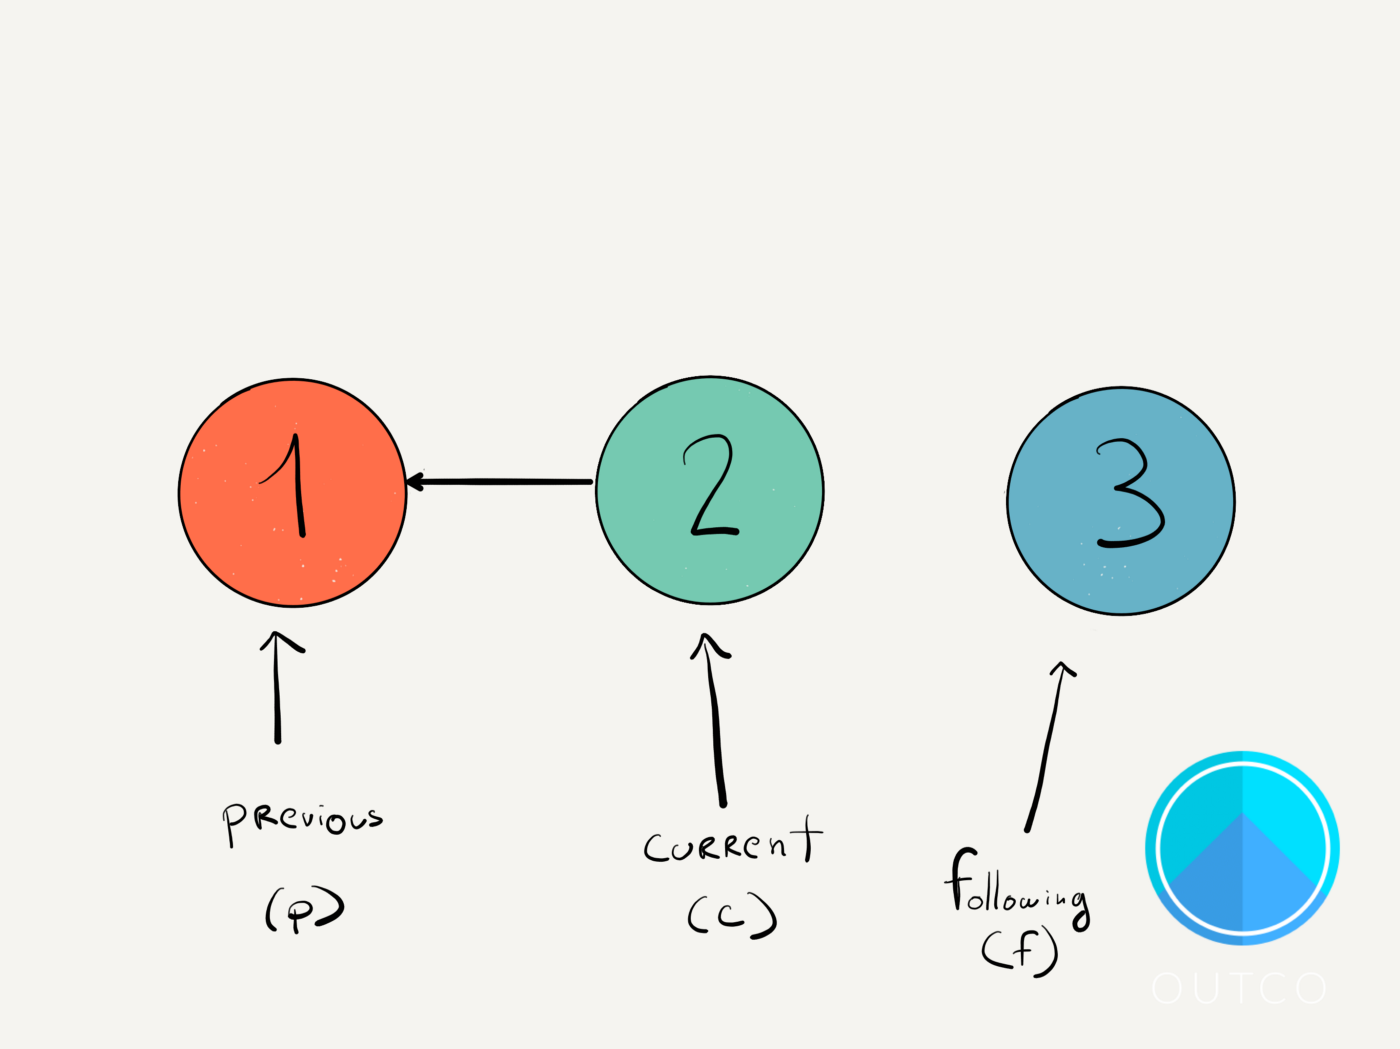

In [ ]:
# Inverte a lista encadeada
def reverse(self):
  # Passo 1
  previous = None
  current = self.head
  following = self.head
  # Passo 2
  while current != None:
    following = following.next
    current.next = previous
    previous = current          
    current = following
  # Passo 3
  self.head = previous

[3]

E assim, a classe ListaEncadeada está completa. É interessante notar as complexidades das operações de uma lista encadeada. A função is_empty() e a função add-hear() são O(1), enquanto as funções add_tail(), size(), search() e remove() são todas O(n). A seguir encontra-se a listagem completa do código fonte em Python para a classe UnorderedList.

In [ ]:
# Implementação da classe nó
class Node:
     # Construtor   
     def __init__(self, init_data):
          self.data = init_data
          self.next = None  # inicialmente não aponta para ninguém
     
     # Obtém o dado armazenado
     def get_data(self):
          return self.data
     
     # Retorna o próximo elemento (para quem nó aponta)
     def get_next(self):
          return self.next

     # Armazena uma nova informação (atualiza dados)
     def set_data(self, new_data):
          self.data = new_data

    # Aponta o nó para outro nó
     def set_next(self, new_next):
          self.next = new_next

# Implementa a classe UnorderedList 
# (Lista encadeada não ordenada)
class UnorderedList:
    # Construtor (aponta cabeça da lista para None)
    def __init__(self):
        self.head = None

    # Verifica se lista está vazia
    def is_empty(self):
        return self.head == None

    # Adiciona elemento no início da lista
    def add_head(self, item):
        # Cria novo nó
        temp = Node(item)
        # Aponta novo nó para cabeça da lista
        temp.set_next(self.head)
        # Atualiza a cabeça da lista
        self.head = temp

    # Adiciona elemento no final da lista
    def add_tail(self, item):
        # Cria novo nó
        tail = Node(item)
        # Usa referência temporária para percorer lista (inicio=cabeça)
        temp = self.head
        # Percorre a lista até o último elemento
        while temp.next != None:
            temp = temp.next
        # Aponta tail (ultimo elemento) para novo nó
        temp.set_next(tail)

    # Imprime elementos da lista
    def print_list(self):
        # Aponta referência para cabeça
        temp = self.head
        X = []
        # Percorre lista adicionando elementos em X
        while temp != None:
            X.append(temp.data)
            temp = temp.get_next()
        return X


    # Calcula o número de elementos na lista
    def size(self):
        # Aponta para cabeça da lista
        temp = self.head
        count = 0
        # Percorre lista contando elementos
        while temp != None:
            count = count + 1
            temp = temp.get_next()
        return count

    # Busca pelo elemento na lista
    def search(self,item):
        # Inicia na cabeça da lista
        temp = self.head
        found = False
        # Percorre a lista até achar elemento u chegar no final
        while temp != None and not found:
            # Se achar atual nó contém elemento, found == True
            if temp.get_data() == item:
                found = True
            else:
                # Senão, aponta para o sucessor
                temp = temp.get_next() 
        return found

    # Remove um nó da lista encadeada
    def remove(self, item):
        # Aponta a referência corrente para cabeça de L
        current = self.head
        # Aponta referência previous para None
        previous = None
        found = False
        # Enquanto não encontrar o valor a ser removido
        while not found:
            # Se nó corrente armazena o item desejado, encontrou
            if current.get_data() == item:
                found = True
            else:
                # Se no corrente não é o que buscamos
                # Atualiza o previous e o corrente
                previous = current
                current = current.get_next()
        # Se nó a ser removido for o primeiro da lista
        # Altera a cabeça da lista
        if previous == None:
            self.head = current.get_next()
        else:
            # Caso não seja primeiro nó, liga o previous com o próximo
            previous.set_next(current.get_next())
        # Desliga nó corrente
        current.set_next(None)

    # Inverte a lista encadeada
    def reverse(self):
      # Passo 1
      previous = None
      current = self.head
      following = self.head
      # Passo 2
      while current != None:
        following = following.next
        current.next = previous
        previous = current          
        current = following
      # Passo 3
      self.head = previous

if __name__ == '__main__':
    # Cria lista vazia
    L = UnorderedList()
    print(L.is_empty())
    # Insere no início
    L.add_head(1)
    L.add_head(2)
    L.add_head(3)
    print(L.print_list())
    print(L.size())
    print(L.is_empty())
    # Insere no final
    L.add_tail(4)
    L.add_tail(5)
    L.add_tail(6)
    L.add_tail(12)
    print(L.print_list())
    print(L.size())
    print(L.search(5))
    print(L.search(29))
    L.remove(5)
    print(L.print_list())
    print(L.size())
    L.reverse()
    print(L.print_list())

True
[3, 2, 1]
3
False
[3, 2, 1, 4, 5, 6, 12]
7
True
False
[3, 2, 1, 4, 6, 12]
6
[12, 6, 4, 1, 2, 3]


Link para explicação em vídeo: https://www.youtube.com/watch?v=8x54aNIR-vo&list=PL7OlISixQYm6lhuuNEadZ_ua4qCVl6zH7&index=28

**Listas encadeadas ordenadas**

Quando trabalhamos com listas ordenadas, os dois métodos que precisam de ajustes em relação as listas encadeadas não ordenadas são search() e add(). Na inserção de um novo nó, devemos primeiramente encontrar sua posição na lista. Na busca pelo elemento, não precisamos percorrer toda a lista encadeada, pois se o elemento buscado é maior que o atual e ainda não o encontramos, significa que ele não pertence a lista. A seguir apresentamos a função que verifica se um elemento faz parte de uma lista ordenada ou não.


In [ ]:
def search(self, item):
	# Inicio da lista
	current = self.head
	found = False
	stop = False
	# Enquanto não atingir o final da lista e não encontrou e não parou
	while current != None and not found and not stop:
		# Se nó atual é o elemento, encontrou
		if current.get_data() == item:
			found = True
		else:
			# Senão, se elemento atual é maior que valor buscado, pare
			if current.get_data() > item:
				stop = True
			else:
				# Caso contrário, vai para o próximo
				current = current.get_next()
	return found

Devemos também modificar o método add(), que insere um novo elemento a lista ordenada. A ideia consiste em encontrar a posição correta do elemento na lista ordenada, então para isso é mais fácil iniciar pela cabeça da lista. A figura a seguir ilustra o processo.

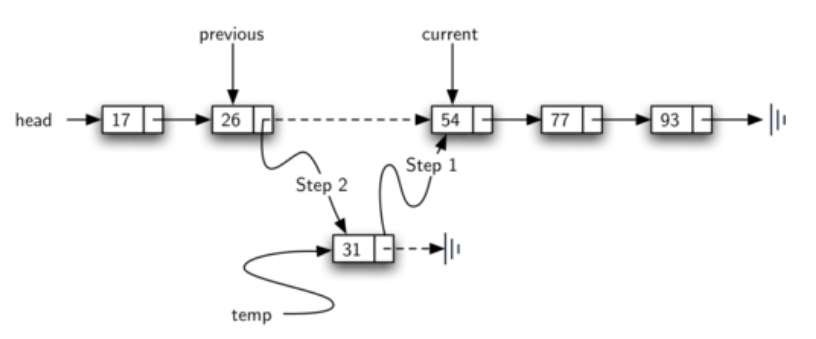

Para encontrar a posição correta precisamos de duas referências, assim como na remoção de um elemento. A posição correta da inserção na lista ordenada ocorre exatamente quando o valor da referência prévia é menor que o valor do novo elemento, que por sua vez é menor que o valor da referência atual. Note na figura que 31 está entre 26 e 54.

A diferença em relação a complexidade da lista encadeada não ordenada é que na lista ordenada inserção é O(n).

In [ ]:
# Adiciona elemento na posição correta da lista
def add(self, item):
	# Inicia na cabeça da lista
	current = self.head
	previous = None
	stop = False
       
	# Enquanto não chegar no final e não parou
	while current != None and not stop:
		# Se valor do corrente for maior elemento desejado
		# encontrou a posição correta para inserção
		if current.get_data() > item:
			stop = True
		else:
			# Senão, move o prévio e o corrente para o próximo
			previous = current
			current = current.get_next()
	# Cria novo nó
	temp = Node(item)
	# Se for primeiro elemento, prévio = None (modificar a cabeça da lista)
	if previous == None:
		temp.set_next(self.head)
		self.head = temp
	else:
		# Senão, estamnis no meio ou último
		temp.set_next(current)
		previous.set_next(temp)

Link para explicação em vídeo: https://www.youtube.com/watch?v=QsHFYkCkNDo&list=PL7OlISixQYm6lhuuNEadZ_ua4qCVl6zH7&index=29

**Listas duplamente encadeadas**

Conforme vimos anteriormente, a inserção no final de uma lista encadeada tem complexidade O(n). Uma maneira de melhorar essa operação consiste na definição de listas duplamente encadeadas. Em listas duplamente encadeadas, tanto a inserção quanto a remoção no final são operações O(1).

Em uma lista duplamente encadeada, cada nó possui uma informação e duas referências: uma para o nó antecessor e outra para o nó sucessor.



In [ ]:
class Node:
  # Construtor	
  def __init__(self, init_data, prev, next):
    self.data = init_data
    self.prev = prev		# inicialmente não aponta para ninguém
    self.next = next
	        
  # Obtém o dado armazenado
  def get_data(self):
    return self.data

	# Atualiza dado armazenado
  def set_data(self, new_data):
    self.data = new_data

Assim como a lista encadeada possui uma cabeça (head) que sempre aponta para o início do encadeamento lógico, uma lista duplamente encadeada possui duas referências especiais: a própria cabeça, que chamaremos de header, e a cauda, que chamaremos de trailer. A figura a seguir ilustra a estrutura de uma lista duplamente encadeada.

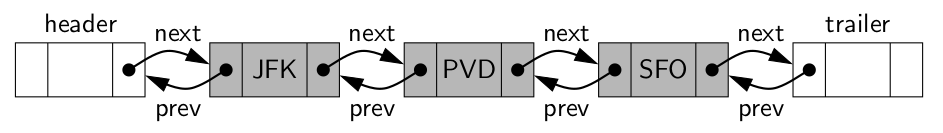

Para essa classe, adotaremos a estratégia de a cada nó inserido, incrementar em uma unidade o seu tamanho e a cada nó removido, decrementar em uma unidade o seu tamanho, assim não precisamos de uma função para contar quantos elementos existem na lista. 

Com relação a operação de inserção, a principal diferença em relação a lista encadeada é que aqui devemos ligar o novo nó tanto ao seu elemento sucessor quanto ao seu elemento antecessor, conforme ilustra a figura a seguir.

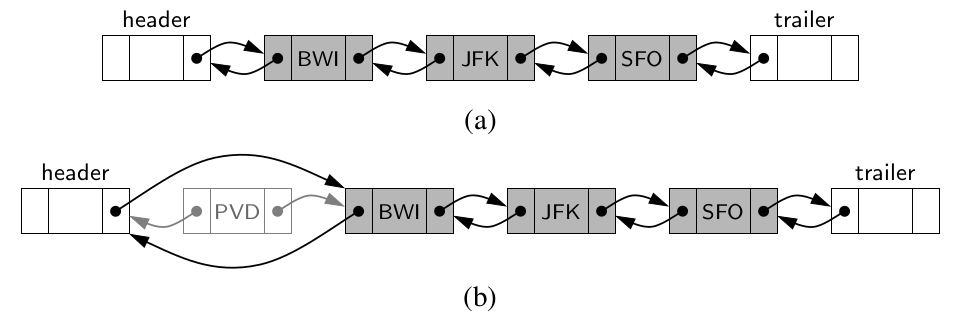

A mesma observação vale para a remoção de um nó. Para desconectá-lo completamente da lista duplamente encadeada, devemos ligar o antecessor ao sucessor e vice-versa, conforme ilustra a figura a seguir.

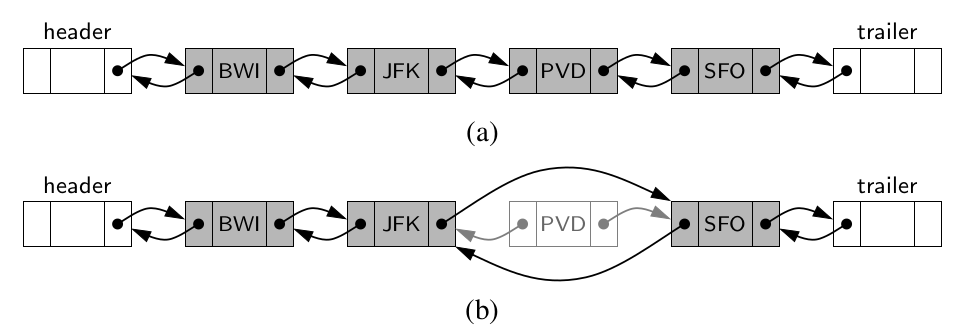

A implementação completa da classe DoubleList em Python encontra-se a seguir.

In [ ]:
# Implementação da classe nó
class Node:
     # Construtor   
    def __init__(self, init_data, prev, prox):
        self.data = init_data
        self.prev = prev        # inicialmente não aponta para ninguém
        self.next = prox
            
    # Obtém o dado armazenado
    def get_data(self):
        return self.data

    # Atualiza dado armazenado
    def set_data(self, new_data):
        self.data = new_data

# Implementa a classe UnorderedList (Lista encadeada não ordenada)
class DoubleList:
    # Construtor (aponta cabeça da lista para None)
    def __init__(self):
        # Cria nós iniciais e finais
        self.header = Node(None, None, None)
        self.trailer = Node(None, None, None)
        # trailer é no final
        self.header.next = self.trailer
        # header é no início
        self.trailer.prev = self.header
        self.size = 0

    # Verifica se lista está vazia
    def is_empty(self):
        return self.size == 0
 
    # Retorna o número de elementos na lista (função len)
    def __len__(self):        
        return self.size
    
    # Insere novo nó entre dois nós existentes
    def insert_between(self, item, predecessor, successor):
        newest = Node(item, predecessor, successor) 
        predecessor.next = newest
        successor.prev = newest
        newest.prev = predecessor
        newest.next = successor
        self.size += 1
        return newest

    # Remove um nó intermediário da lista
    # Header e trailer nunca podem ser removidos! 
    def delete_node(self, node):
        predecessor = node.prev
        successor = node.next
        predecessor.next = successor
        successor.prev = predecessor
        self.size -= 1
        # Armazena o elemento removido
        element = node.data
        node.prev = node.next = node.element = None
        return element

    # Insere elemento no início
    def insert_first(self, data):
        # nó deve entrar entre header e header.next
        self.insert_between(data, self.header, self.header.next)

    # Insere elemento no final
    def insert_last(self, data):
        # nó deve entrar entre trailer.prev e trailer
        self.insert_between(data, self.trailer.prev, self.trailer)

    # Remove elemento no início
    def delete_first(self):
        if self.is_empty():
            raise Empty('Lista está vazia!')
        return self.delete_node(self.header.next)

    # Remove elemento no final
    def delete_last(self):
        if self.is_empty():
            raise Empty('Lista está vazia!')
        return self.delete_node(self.trailer.prev)

    # Imprime elementos da lista
    def print_list(self):
        # Aponta referência para cabeça
        temp = self.header.next
        X = []
        # Percorre lista adicionando elementos em X
        while temp.next != None:
            X.append(temp.data)
            temp = temp.next
        return X

if __name__ == '__main__':
    # Cria lista vazia
    L = DoubleList()
    print(L.is_empty())
    # Insere no início
    L.insert_first(1)
    L.insert_first(2)
    L.insert_first(3)
    print(L.print_list())
    print(len(L))
    print(L.is_empty())
    # Insere no final
    L.insert_last(4)
    L.insert_last(5)
    L.insert_last(6)
    print(L.print_list())
    print(len(L))
    L.delete_first()
    L.delete_last()
    print(L.print_list())
    print(len(L))

True
[3, 2, 1]
3
False
[3, 2, 1, 4, 5, 6]
6
[2, 1, 4, 5]
4


Link para explicação em vídeo: https://www.youtube.com/watch?v=0uw6j-9CJ0c&list=PL7OlISixQYm6lhuuNEadZ_ua4qCVl6zH7&index=30

Link para ambiente de execução Google Colab: https://colab.research.google.com/drive/1f8_-s3j4h50x_ncYOQuRlbcbR-DzViIk?usp=sharing

Até o presente momento, estudamos estruturas de dados lineares, como listas, pilhas e filas. A partir de agora, iremos estudar estruturas consideradas não lineares, no sentido de que a o encadeamento lógico dos elementos permite organizações mais complexas e otimizadas para a busca. Esse é o caso das árvores binárias, assunto das próximas aulas.

"The real voyage of discovery consists not in seeking new landscapes, but in having new eyes." (Marcel Proust)
